## Bit of a review

Importing out usual things!

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

In [71]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
286,2018-07-01,20749.752
287,2018-10-01,20897.804
288,2019-01-01,21098.827
289,2019-04-01,21340.267


In [72]:
# a bit of data manipulation
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

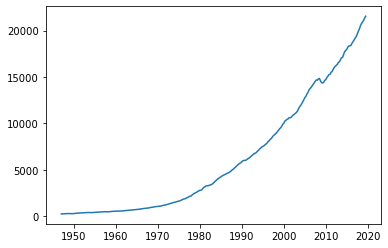

In [73]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.show()

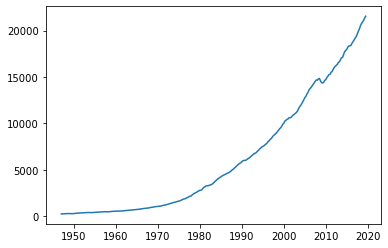

In [74]:
# we also did this in a slightly different way
fig, ax = plt.subplots(1,1)
ax.plot(gdp['DATE'], gdp['GDP'])
plt.show()

## Working with Image data

In [75]:
# import the Image submodule from the pillow library
#. pillow = PIL
import PIL.Image as Image

In [76]:
Image

<module 'PIL.Image' from '/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/PIL/Image.py'>

In [77]:
im = Image.open("stitch_reworked.png",'r') # 'r' means read in (instead of write)

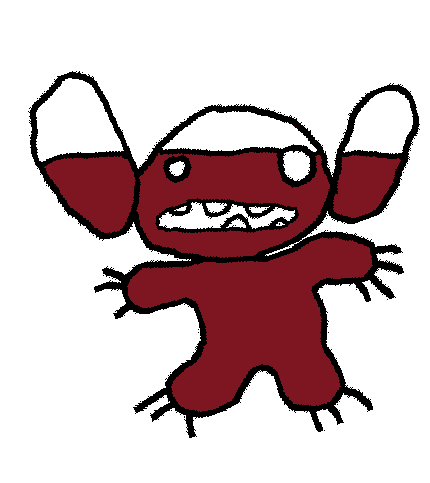

In [78]:
im # quick way to look at our image
#type(im)

In [79]:
# turn this image INTO data using NumPy
data = np.array(im)

In [80]:
data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [81]:
# look at the shape of this data
data.shape

(483, 430, 4)

Ok, last element of `.shape` is the RGBA channel list.

483, 430 width/height in pixels

Plot this data using matplotlib (use fig,ax again):

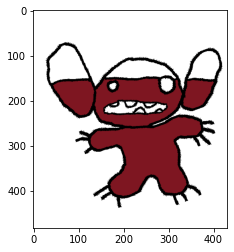

In [82]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.imshow(data) # imshow is specific to plotting images

plt.show()

In [83]:
#we can say that the 483=height and the 430=width

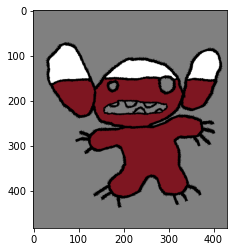

In [84]:
# we want to use a gray background to show what parts of our image are see through
#. where the "A" channel is set to zero
fig, ax = plt.subplots(1,1,figsize=(4,4))

# set the facecolor of our ax object to be gray
ax.set_facecolor('gray')

ax.imshow(data) # imshow is specific to plotting images

plt.show()

How many colors are in this image?  What are their RGBA codes?

We are going to use NumPy's `.unique` function to see how many unique colors are in this image.

In [85]:
# test
np.unique([5,6,7,88, 55, 5, 6])

array([ 5,  6,  7, 55, 88])

In [86]:
np.unique(data.reshape(-1, data.shape[2]), axis=0)
# this will list out the unique colors
# its a little handwavy (more info in the prep notebook)
# at like ~30% of getting what is going on that is ok!

# order of columns here is:
#. R=red, G=green, B=blue, A=opacity
#.   0,     1,      2,      3

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

This weird thing that I just copied in shows the unique RGBA combinations in this image data.

We see this RGBA encoding is going from 0-255 (sometimes it goes from 0-1 in decimal numbers)

Now that we know a bit about the colors in this image, we can mess with them!

We'll do this with a "boolean mask" (subsetting a dataset).

In [87]:
# a quick boolean reminder:
126 == 126 # testing for true-ness

True

In [88]:
# we can create an array, a MASK, that will hold for each pixel whether or not
#. it has a R channel component equal to 126 or not (126, 22, 33, 355) is the maroon color
#. 126 in the R channel uniquely defines these pixels

# pick the R channel to look at
image_boolean_mask = data[:,:,0] == 126

In [89]:
image_boolean_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [90]:
image_boolean_mask.shape

(483, 430)

In [91]:
data[200,250,0] # this will be y=200, x = 250, Red channel = 0

126

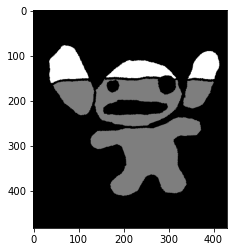

In [92]:
# plot JUST the red channel

fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.imshow(data[:,:,0], cmap='gray') # plotting just the red channel

plt.show()

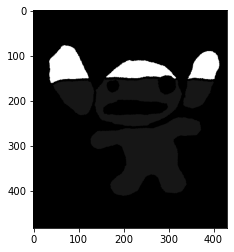

In [93]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.imshow(data[:,:,1], cmap='gray') # plotting just the GREEN channel

plt.show()

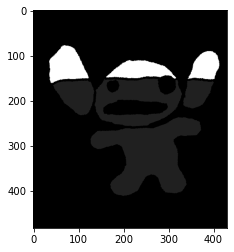

In [94]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.imshow(data[:,:,2], cmap='gray') # plotting just the BLUE channel

plt.show()

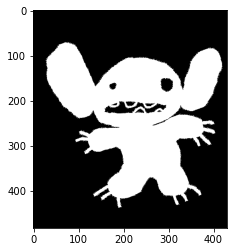

In [95]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.imshow(data[:,:,3], cmap='gray') # plotting just the A (Alpha, Opacity) channel

plt.show()

In [96]:
image_boolean_mask = data[:,:,0] == 126 # grabbing a MASK of all pixels that are maroon

Now that we have this mask, we can start messing with our colors.

I'm going to replace Stitch's maroon parts with blue

RGBA = [0,0,255,255]

In [97]:
data[image_boolean_mask] = [0,0,255,255] # turning maroon into blue

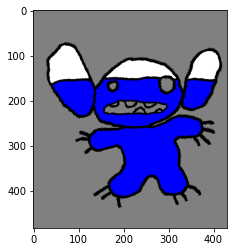

In [98]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

# set the facecolor of our ax object to be gray
ax.set_facecolor('gray')

ax.imshow(data) # imshow is specific to plotting images

plt.show()

We downloaded `image_manipulations.py` file and stored it in the *SAME* directory as this notebook file.

In [122]:
from image_manipulations import my_boolean_mask
# from the image_manipulations library its importing a SPECFIC function

In [100]:
my_boolean_mask?

Take the black lines and make them another color -- magenta.

This time instead of doing it "by hand" we'll do this ith the `my_boolean_mask` function.

In [102]:
data.shape

(483, 430, 4)

In [105]:
image_boolean_mask2 = my_boolean_mask(data, [0,0,0,255]) # all of pixels where we have black lines

In [106]:
image_boolean_mask2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [64]:
image_boolean_mask2.shape

(483, 430)

Now let's do something a little different - let's make a copy of our `data` variable and then do any changes to that copied variable (and save `data` to compare to).

In [66]:
dataCopy = data.copy() # .copy is a NumPy function, a thing you can do to NumPy arrays

In [104]:
dataCopy.shape

(483, 430, 4)

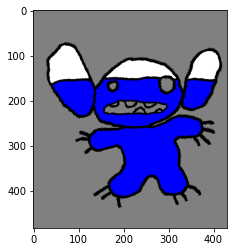

In [103]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

# set the facecolor of our ax object to be gray
ax.set_facecolor('gray')

ax.imshow(data) # imshow is specific to plotting images

plt.show()

In [107]:
# now update my copied data - turn black lines into magenta lines
dataCopy[image_boolean_mask2] = [255, 0, 255, 255]
#dataCopy[image_boolean_mask2] = 'magenta'

In [54]:
dataCopy.shape

(483, 430, 4)

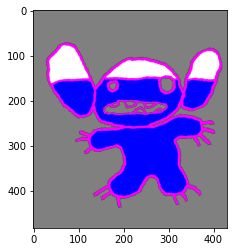

In [108]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

# set the facecolor of our ax object to be gray
ax.set_facecolor('gray')

ax.imshow(dataCopy) # imshow is specific to plotting images

plt.show()

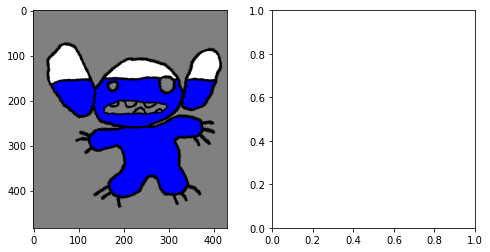

In [59]:
# side-by-side figures to compare data & dataCopy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# ax object is now an ARRAY of axis

# plot the original data object on first plot (index = 0)
ax[0].set_facecolor('gray')
ax[0].imshow(data)

plt.show()

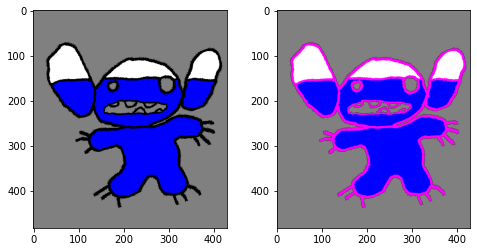

In [60]:
# side-by-side figures to compare data & dataCopy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# ax object is now an ARRAY of axis

# plot the original data object on first plot (index = 0)
ax[0].set_facecolor('gray')
ax[0].imshow(data)

# second set of axis -- updated image object
ax[1].set_facecolor('gray')
ax[1].imshow(dataCopy)

plt.show()

## Looking at color components
Recall: the whole purpose of Lilo's visualization was to measure & depict Stitch's goodness & badness levels.

Now that we can make masks we can count up the number of pixels of a color.

In [121]:
# re-read in our image data
im = Image.open("stitch_reworked.png", 'r') # reading in image
data = np.array(im) # into data

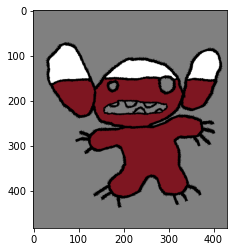

In [111]:
# redo our plot from before
fig, ax = plt.subplots(1,1, figsize=(4,4))

ax.set_facecolor('gray') # one plot, so don't have to worry about indexing

ax.imshow(data) # imshow NOT show!

plt.show()

Now that we know how to mask we can grab # of pixels associate with a color.

Goodness and badness mask:

In [112]:
goodness_mask = my_boolean_mask(data,[255,255,255,255]) # white parts of ears
badness_mask = my_boolean_mask(data, [126,22,33,255]) # maroon body

In [113]:
# count pixels in each of these "good" or "bad" areas of the image
npix_good = len(data[goodness_mask]) # number of pixels in the "good" subset
npix_bad = len(data[badness_mask])

In [114]:
npix_good

11929

In [115]:
npix_bad

40949

In [116]:
npix_good, npix_bad # on the same output line

(11929, 40949)

In [123]:
# calculate the goodness as a percentage of pixels: good pixels/(good pixels & bad pixels)
npix_good/(npix_good + npix_bad)

0.22559476530882408

In [124]:
# Stitch is ~23% good!

# Meta-visualization of stitch's goodnes/badness as a histogram

# .bar this time (instead of .hist) because we have the numbers pre-calculated
#.   have to give .bar a set of labels (x) and values (y)
labels = np.array(['badness', 'goodness'])
values = np.array([npix_bad, npix_good])

In [125]:
labels, values

(array(['badness', 'goodness'], dtype='<U8'), array([40949, 11929]))

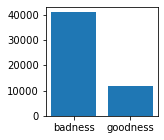

In [127]:
fig, ax = plt.subplots(1,1, figsize=(2,2))

ax.bar(labels, values)

plt.show()

In [128]:
# badness color = maroon, XXXease of being able to see it, goodness = light grayXXX
# goodness = 'white', change background to gray
colors = np.array(['maroon', 'white'])

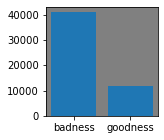

In [138]:
fig, ax = plt.subplots(1,1, figsize=(2,2))

ax.set_facecolor('gray')

myBarChart = ax.bar(labels, values) # SAVING what gets plotted on an axis as a variable

plt.show()

In [132]:
myBarChart[0] # this is indexing to the object that is drawn as the first bar on this chart

In [140]:
# so I can use myBarChart as a variable and update the colors
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])

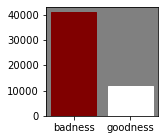

In [141]:
fig

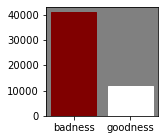

In [143]:
# let's reorganize

# 1. Define all of the data elements
labels = np.array(['badness', 'goodness'])
values = np.array([npix_bad, npix_good])
colors = np.array(['maroon', 'white'])

# 2. Make the bar chart
fig, ax = plt.subplots(1,1, figsize=(2,2))
ax.set_facecolor('gray')
myBarChart = ax.bar(labels, values) # SAVING what gets plotted on an axis as a variable

# 3. Update the colors of said bar chart
# so I can use myBarChart as a variable and update the colors
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    
# 4. consistent
plt.show()

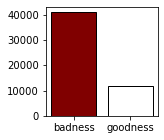

In [144]:
# 1. Define all of the data elements
labels = np.array(['badness', 'goodness'])
values = np.array([npix_bad, npix_good])
colors = np.array(['maroon', 'white'])

# 2. Make the bar chart
fig, ax = plt.subplots(1,1, figsize=(2,2))
#ax.set_facecolor('gray')
myBarChart = ax.bar(labels, values) # SAVING what gets plotted on an axis as a variable

# 3. Update the colors of said bar chart
# so I can use myBarChart as a variable and update the colors
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black')
    
# 4. consistent
plt.show()

In [145]:
# we actually have a function for this
from image_manipulations import color_components

In [146]:
colors, color_labels, color_rgb_labels, npix_of_a_color = color_components(data)

In [148]:
color_rgb_labels

['0,0,0,0', '0,0,0,255', '126,22,33,255', '255,255,255,255']

In [149]:
npix_of_a_color

[135103, 19709, 40949, 11929]

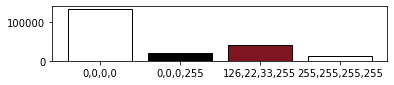

In [154]:
#labels = np.array(['badness', 'goodness'])
#values = np.array([npix_bad, npix_good])
#colors = np.array(['maroon', 'white'])
# based on our function we can replace:
labels = color_rgb_labels
values = npix_of_a_color
colors = colors

# 2. Make the bar chart
fig, ax = plt.subplots(1,1, figsize=(6,1))
#ax.set_facecolor('gray')
myBarChart = ax.bar(labels, values) # SAVING what gets plotted on an axis as a variable

# 3. Update the colors of said bar chart
# so I can use myBarChart as a variable and update the colors
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black')
    
# 4. consistent
plt.show()